In [84]:
import pandas as pd
from pandas import datetime
import numpy as np

from matplotlib import pyplot

In [73]:
def date_parser(date):
    return datetime.strptime(date, '%d-%m-%y')

sales = pd.read_csv('datasets/shampoo.csv',date_parser=date_parser,parse_dates=[0],index_col=[0])

In [81]:
sales.columns = ['Sales']
sales.head()

,Sales
Month,
2015-01-01,266.0
2015-02-01,145.9
2015-03-01,183.1
2015-04-01,119.3
2015-05-01,180.3


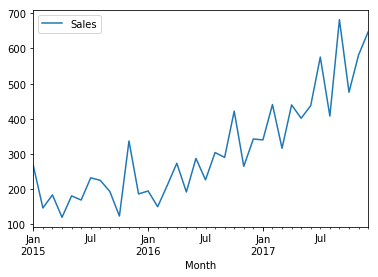

In [85]:
sales.plot()
pyplot.show()

In [89]:
from pandas.tools.plotting import autocorrelation_plot

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


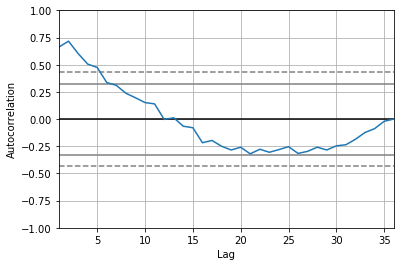

In [103]:
autocorrelation_plot(sales)
pyplot.show()

In [101]:
import numpy
def acf(series):
    n = len(series)
    data = numpy.asarray(series)
    mean = numpy.mean(data)
    c0 = numpy.sum((data - mean) ** 2) / float(n)

    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        return acf_lag
    x = numpy.arange(n) # Avoiding lag 0 calculation
    acf_coeffs = map(r, x)
    return acf_coeffs

In [102]:
autocorr = acf(sales['Sales'])

In [104]:
from statsmodels.tsa.arima_model import ARIMA

C:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [106]:
# fit model
model = ARIMA(sales, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 27 Jun 2017   AIC                            406.340
Time:                        14:05:27   BIC                            417.227
Sample:                    02-01-2015   HQIC                           410.098
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

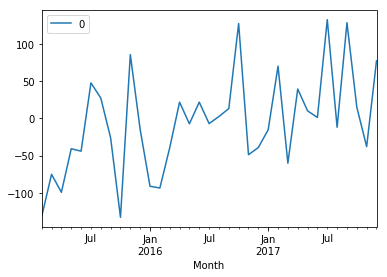

In [108]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

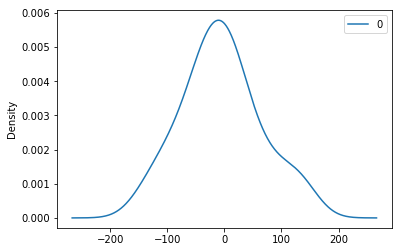

                0
count   35.000000
mean    -5.495234
std     68.132881
min   -133.296613
25%    -42.477967
50%     -7.186668
75%     24.748316
max    133.237956


In [109]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())